In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#creating a new column family using Siblings and children
df["Family"] = df["SibSp"]+df["Parch"]
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [ ]:
#Ticket ---> As it is just a random number ,we canskip column for analsis
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [ ]:
#Based on the categories,we will analyse which category people were most likely to survive
#low,mid,mid high,high
df["Fare_Category"] = pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],
                             labels=["Low","Mid","Mid-High","High"])
df["Fare_Category"].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [ ]:
df.drop("Fare_category",axis=1,inplace=True)

KeyError: ignored

In [ ]:
#comparing fare with fare category
df[["Fare","Fare_Category"]]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


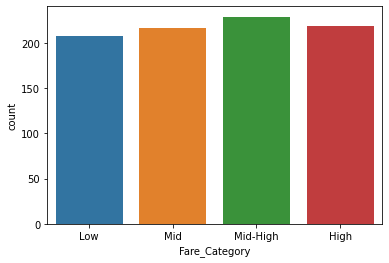

In [ ]:
#Visualize Fare category
# Countplot give
sns.countplot(x="Fare_Category",data=df)

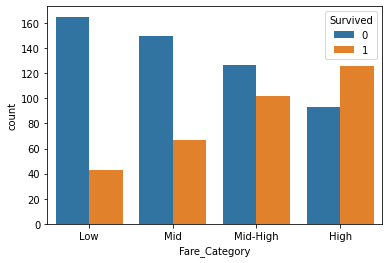

In [ ]:
#Visulizing the count of categories based on survived
sns.countplot(x="Fare_Category",hue="Survived",data=df)

Text(0.5, 1.0, 'Survival based on Fare category')

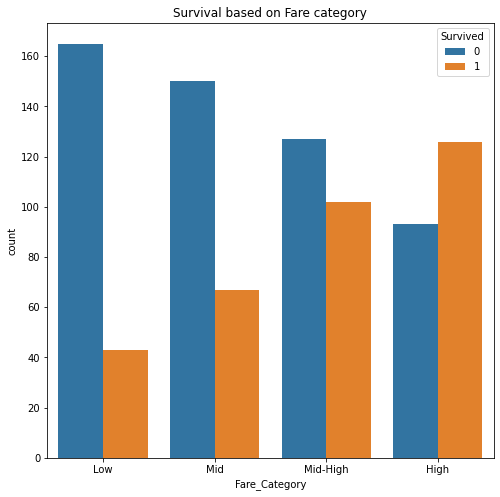

In [ ]:
#Visulizing the count of categories based on survived
plt.figure(figsize=(8,8))
sns.countplot(x="Fare_Category",hue="Survived",data=df).\
            set_title("Survival based on Fare category")


+ We can observe that the chances of survival for people under high fare category are increasing as fare increases

In [ ]:
#Boarding port(Embarked port)
df.Embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

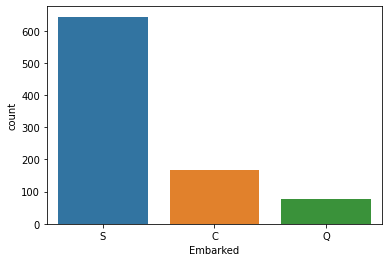

In [ ]:
#visualizing port column
sns.countplot(x="Embarked",data=df)

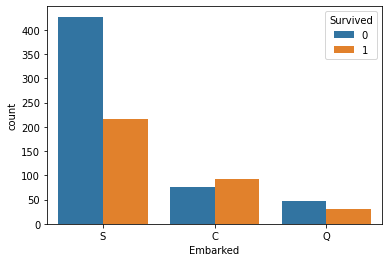

In [ ]:
p = sns.countplot(x="Embarked",data=df,hue="Survived")
#visulaizing port column using survived

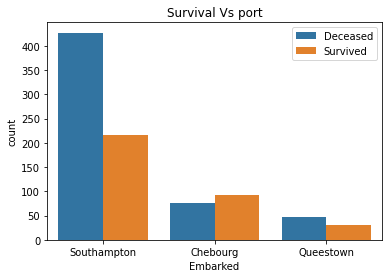

In [ ]:
p = sns.countplot(x="Embarked",data=df,hue="Survived")
p.set_title("Survival Vs port")
p.set_xticklabels(["Southampton","Chebourg","Queestown"])
p.legend(labels=["Deceased","Survived"])

In [ ]:
#imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [ ]:
#Cabin --> 77% missing values,creating a new category as NA
df.Cabin.fillna("NA",inplace=True)

In [ ]:
df.Cabin.isna().sum()

0

In [ ]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#filling median in age column of nan
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [ ]:
# imputing embarked with mode
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [ ]:
#imputing farecategory with mode
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

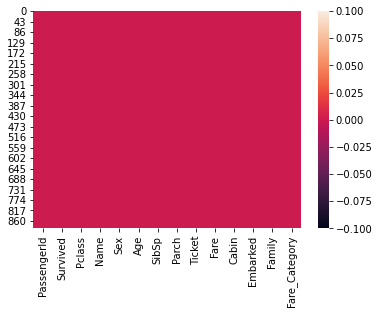

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [ ]:
df["Age-range"]= pd.cut(df.Age,[0,10,20,30,40,60,80])
df[["Age","Age-range"]].head()

,Age,Age-range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [ ]:
#Encoding all at once
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix="Cabin",drop_first=True),
                    pd.get_dummies(df.Embarked,prefix="Emb",drop_first=True),
                    pd.get_dummies(df.Fare_Category,prefix="Fare",drop_first=True),
                    pd.get_dummies(df["Age-range"],drop_first=True)],axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-range,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S,0,Mid,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Mid-High,"(10, 20]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NA,S,3,Mid-High,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mid-High,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
#Encoding sex column with label encoder
from sklearn.preprocessing import LabelEncoder
df["Sex"]=LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-range,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,...,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
#droping unnecessary columns
df.drop(["PassengerId","Name","Age","SibSp","Parch","Ticket","Embarked","Fare","Fare_Category","Cabin","Age-range"],axis=1,inplace=True)

In [ ]:
df.shape

(891, 161)

In [ ]:
df.dtypes

Survived     int64
Pclass       int64
Sex          int64
Family       int64
Cabin_A14    uint8
             ...  
(10, 20]     uint8
(20, 30]     uint8
(30, 40]     uint8
(40, 60]     uint8
(60, 80]     uint8
Length: 161, dtype: object

In [ ]:
# Seperating input and output data,dropping survival column
X = df.drop("Survived",axis=1)
X.shape

(891, 160)

In [ ]:
# Output column
y = df.iloc[:,0]
y.shape

(891,)

In [ ]:
#seperate i/o into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 160)
(223, 160)
(668,)
(223,)
